This example show how to use the dynamic multiobjective benchamrks and algorithms

In [1]:
import autograd.numpy as anp
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
import matplotlib.pyplot as plt
from pymoo.factory import get_performance_indicator

First we import some packages used in this example.

In [2]:
from dynamic_mop import DMOP2

First we import the benchmarks problems from

In [3]:
from dynamic_algorithms import DNSGA2_a

We import then DNSGA2_a algorithm, a variant of NSGA2 that deals with Dynamic problems.

We define some variable as:

nt: severity of change

taut: frequency of change

tauT: maximum number of generation

tau : current generation

In [4]:
nt_ = 5
taut_ = 10
tauT = 200

In [5]:
algorithm = DNSGA2_a(pop_size=100)
problem = DMOP2(nt=nt_, taut=taut_)

PF = []
def callback(ex_algorithm):
    if ex_algorithm.problem.has_changed:
        PF.append(ex_algorithm.problem.get_pf_t())

This call back is to store the result (pf) in each time the problem changes

In [6]:
algorithm.callback = callback
res = minimize(problem,
               algorithm,
               ("n_gen", tauT),
               save_history=True,
               verbose=False,
               seed=anp.random.randint(1,1000))

Here the problem is a minimization problem.

0.7258291930465677


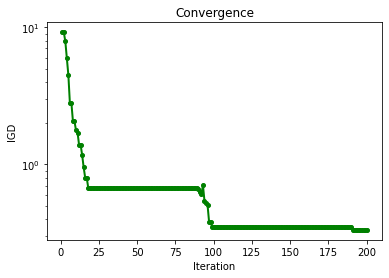

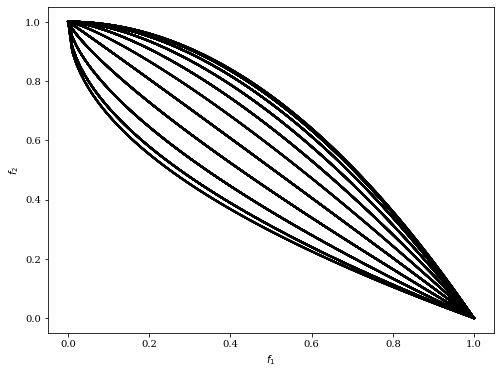

In [7]:
n_gen = []    # corresponding number of function evaluations\
F = []          # the objective space values in each generation
cv = []         # constraint violation in each generation


for algorithm in res.history:
    n_gen.append(algorithm.n_gen)
    opt = algorithm.opt
    cv.append(opt.get("CV").min())
    feas = anp.where(opt.get("feasible"))[0]
    _F = opt.get("F")[feas]
    F.append(_F)

igd = []
# this is to calculate the IGD every time the problem changes.

for idx, pf in enumerate(PF):
    normalize = False
    metric = get_performance_indicator("igd", pf)
    igd = igd + [metric.do(f) for f in F[idx*taut_:(idx*taut_+taut_)]]

print(anp.mean(igd))
plt.plot(n_gen, igd, '-o', markersize=4, linewidth=2, color="green")
plt.yscale("log")          # enable log scale if desired
plt.title("Convergence")
plt.xlabel("Iteration")
plt.ylabel("IGD")
plt.show()

# just plotting the PFs
plot = Scatter()
for pf in PF:
    plot.add(pf, plot_type="line", color="black", linewidth=2)
plot.show()

